# Isolation Forest

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

RAND = 42

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RAND)

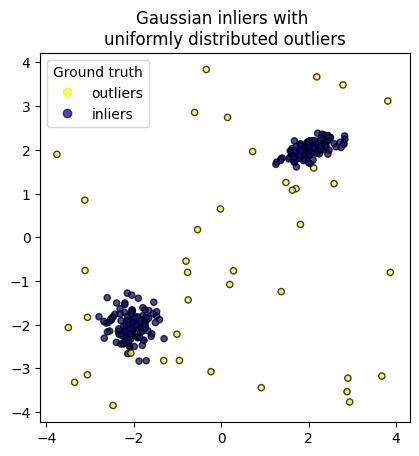

In [19]:
import matplotlib.pyplot as plt

scatter = plt.scatter(*X.T, c=y, cmap="plasma_r", s=20, edgecolor="k", alpha=.75)
handles, labels = scatter.legend_elements()

plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="Ground truth")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

In [20]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(max_samples=100, random_state=RAND)
model.fit(X_train)

IsolationForest(max_samples=100, random_state=42)

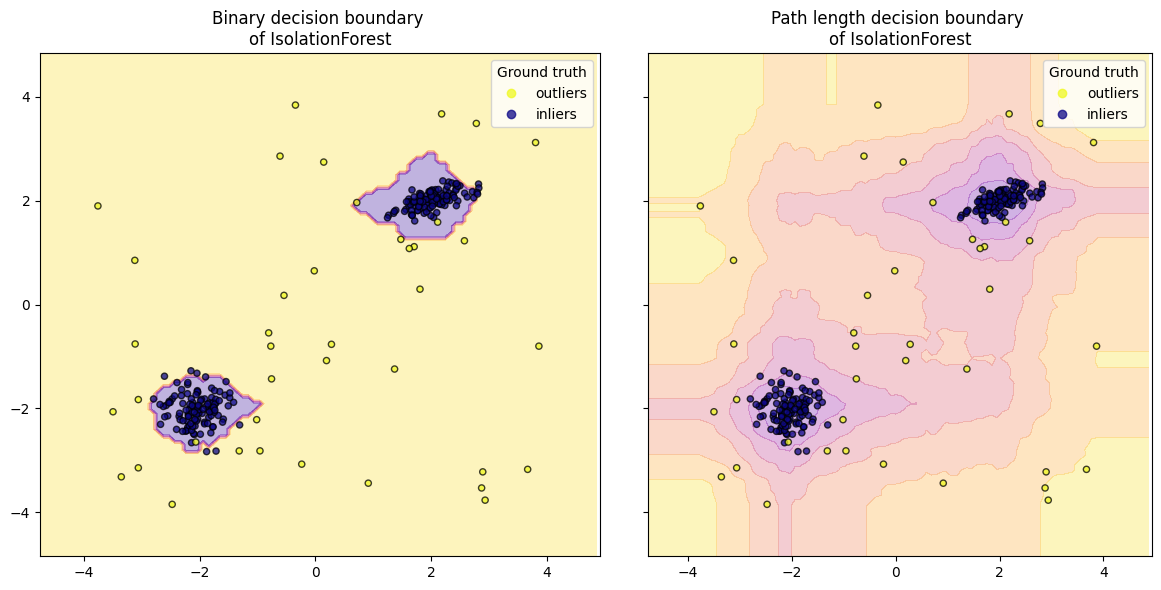

In [28]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax = ax0
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    cmap="plasma_r",
    ax=ax
)

disp.ax_.scatter(*X.T, c=y, cmap="plasma_r", s=20, edgecolor="k", alpha=.75)
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
ax.legend(handles=handles, labels=["outliers", "inliers"], title="Ground truth")

ax = ax1
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    alpha=0.3,
    cmap="plasma_r",
    ax=ax
)

disp.ax_.scatter(*X.T, c=y, cmap="plasma_r", s=20, edgecolor="k", alpha=.75)
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
ax.legend(handles=handles, labels=["outliers", "inliers"], title="Ground truth")

plt.axis("square")
plt.tight_layout()
plt.show()